# EDA

Import dependencies

In [219]:
import pandas as pd
import numpy as np


 Extract data from csv files  :   
 Reading dataset into pamdas DataFrame

In [220]:
app_df=pd.read_csv("Resources/googleplaystore.csv")
review_df=pd.read_csv("Resources/googleplaystore_user_reviews.csv")
app_df.info()
review_df.info()
app_df.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [221]:
print(app_df.columns)
print(review_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


Cleanning data

In [222]:
app_df['Price'] = app_df['Price'].str.replace(r'\$', '',regex=True)
app_df['Price']=pd.to_numeric(app_df['Price'],errors="coerce")
app_df['Price'].fillna(0,inplace=True)
app_df['Price']=app_df['Price'].astype(float)



app_df['Reviews']=app_df['Reviews'].str.replace('M','')
app_df['Reviews']=app_df['Reviews'].astype(float).astype(int)




app_df['Size'] = app_df['Size'].apply(lambda x: 
    
        float(x[:-1]) if isinstance(x, str) and x[-1] == 'M' 
    else 
        (float(x[:-1])/1024) if isinstance(x, str) and x[-1] == 'K' 
    else 
         np.nan if isinstance(x, str) 
    else 
         np.nan)


app_df['Installs']=app_df['Installs'].str.replace('[\+,]','',regex=True)
app_df['Installs']=pd.to_numeric(app_df['Installs'],errors='coerce')
app_df['Installs'].fillna(0,inplace=True)
app_df['Installs']=app_df['Installs'].astype(float).astype(int)

#print(app_df['Price'].unique())
#print(app_df['Price'].dtypes)


#print(app_df['Reviews'].unique())
#print(app_df['Reviews'].dtypes)


#print(app_df['Size'].unique())
#print(app_df['Size'].dtypes)


#print(app_df['Installs'].unique())
#print(app_df['Installs'].dtypes)

app_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Cheking if we have duplicates data in app_df.

In [223]:
# Find the duplicate 'App' names
duplicate_app_mask = app_df['App'].duplicated(keep=False)
duplicate_app_df = app_df[duplicate_app_mask]

# Sort the duplicate_app_df by 'App' column
duplicate_app_df_sorted = duplicate_app_df.sort_values('App')

# Print the top 10 duplicate 'App' names
print(duplicate_app_df_sorted.head(10))
print(duplicate_app_df_sorted.shape)

                               App            Category  Rating  Reviews  Size  \
1393         10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490   3.8   
1407         10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490   3.8   
2543    1800 Contacts - Lens Store             MEDICAL     4.7    23160  26.0   
2322    1800 Contacts - Lens Store             MEDICAL     4.7    23160  26.0   
2385    2017 EMRA Antibiotic Guide             MEDICAL     4.4       12   3.8   
2256    2017 EMRA Antibiotic Guide             MEDICAL     4.4       12   3.8   
1337  21-Day Meditation Experience  HEALTH_AND_FITNESS     4.4    11506  15.0   
1434  21-Day Meditation Experience  HEALTH_AND_FITNESS     4.4    11506  15.0   
3083       365Scores - Live Scores              SPORTS     4.6   666521  25.0   
5415       365Scores - Live Scores              SPORTS     4.6   666246  25.0   

      Installs  Type  Price Content Rating            Genres  \
1393    500000  Free   0.00   Everyone 10+  

In [224]:
# As we had a lot of duplicate app names we decide to get rid of rows that are completely same in all columns
# Drop the duplicate rows
app_df = app_df.drop_duplicates().sort_values('App')
duplicated_count = app_df['App'].duplicated().sum()
duplicated_rows = app_df[app_df.duplicated(subset='App', keep=False)]
print(duplicated_count)
print(duplicated_rows)
#print(app_df.head(10))

698
                                                    App Category  Rating  \
3083                            365Scores - Live Scores   SPORTS     4.6   
5415                            365Scores - Live Scores   SPORTS     4.6   
1755                                        8 Ball Pool     GAME     4.5   
1844                                        8 Ball Pool     GAME     4.5   
1871                                        8 Ball Pool     GAME     4.5   
...                                                 ...      ...     ...   
2637                        textPlus: Free Text & Calls   SOCIAL     4.1   
3055  theScore: Live Sports Scores, News, Stats & Vi...   SPORTS     4.4   
2964  theScore: Live Sports Scores, News, Stats & Vi...   SPORTS     4.4   
8291                     wetter.com - Weather and Radar  WEATHER     4.2   
3652                     wetter.com - Weather and Radar  WEATHER     4.2   

       Reviews  Size   Installs  Type  Price Content Rating   Genres  \
3083    666

From the data above we got that we have same App name in several rows with other columns data. For cleanning the data we want to keep the row with the largest Reviews that shows it was the most new row.

In [225]:
# Find the indices of rows with the maximum reviews for each unique app name
max_reviews_indices = app_df.groupby('App')['Reviews'].idxmax()

# Keep only the rows with the maximum reviews
app_df = app_df.loc[max_reviews_indices]


# Print the top 10 rows
print(app_df.head(10))
print(app_df.shape)
duplicated_count = app_df['App'].duplicated().sum()
duplicated_rows = app_df[app_df.duplicated(subset='App', keep=False)]


                                                  App            Category  \
8884             "i DT" Fútbol. Todos Somos Técnicos.              SPORTS   
8532                    +Download 4 Instagram Twitter              SOCIAL   
324                        - Free Comics - Comic Apps              COMICS   
4541                                               .R               TOOLS   
4636                                           /u/app       COMMUNICATION   
5940                                           058.ba  NEWS_AND_MAGAZINES   
10252                                  1. FC Köln App              SPORTS   
1393                            10 Best Foods for You  HEALTH_AND_FITNESS   
8483                    10 Minutes a Day Times Tables              FAMILY   
7738   10 WPM Amateur ham radio CW Morse code trainer       COMMUNICATION   

       Rating  Reviews  Size  Installs  Type  Price Content Rating  \
8884      NaN       27   3.6       500  Free   0.00       Everyone   
8532      4.

Checking discriptive statistics

In [226]:
app_df.describe()

,Rating,Reviews,Size,Installs,Price
count,8197.000000,9.660000e+03,8117.000000,9.660000e+03,9660.000000
mean,4.175076,2.167817e+05,21.170161,7.797363e+06,1.097117
std,0.560670,1.831337e+06,21.884413,5.376700e+07,16.850750
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.100000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,13.000000,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,29.000000,1.000000e+06,0.000000
max,19.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [227]:
review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Counting the number of rows and columns in app_df . Checking the number of null or zeros in each column. 

In [228]:
row,column=app_df.shape
print("Number of rows:",row)
print("Number of columns:",column)
num_zeros_or_na = app_df.isna().sum()
print(num_zeros_or_na)



Number of rows: 9660
Number of columns: 13
App                  0
Category             0
Rating            1463
Reviews              0
Size              1543
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Displaying the rows with null or zero in 'Type' and 'Content Rating'. Using a boolean mask to identify rows with 0 or NaN values and removing the rows with null or zero .

In [229]:
category_counts = app_df["Type"].value_counts()
print(category_counts)

mask=(app_df['Type']==0)|app_df['Type'].isnull()|(app_df['Content Rating']==0)|app_df['Content Rating'].isnull()
#Apply the mask to DataFrames to filter rows:
rows_with_null_or_na=app_df[mask]
#Display the filtered rows
print(rows_with_null_or_na)

#Dropping the rows with NaN in 'Type' and 'Content Rating':

subset_columns = ['Type', 'Content Rating']
app_df.dropna(subset=subset_columns, inplace=True)




Free    8904
Paid     754
0          1
Name: Type, dtype: int64
                                           App Category  Rating  Reviews  \
9148                 Command & Conquer: Rivals   FAMILY     NaN        0   
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0        3   

       Size  Installs Type  Price Content Rating             Genres  \
9148    NaN         0  NaN    0.0   Everyone 10+           Strategy   
10472   NaN         0    0    0.0            NaN  February 11, 2018   

        Last Updated         Current Ver         Android Ver  
9148   June 28, 2018  Varies with device  Varies with device  
10472         1.0.19          4.0 and up                 NaN  


Dropping Current Ver, Android Ver columns that are not needed in analysis 

In [230]:
app_df=app_df.drop(['Current Ver', 'Android Ver'],axis=1)
app_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

# Data Visualization

Investigating number of free and paid apps on Google Play Store:

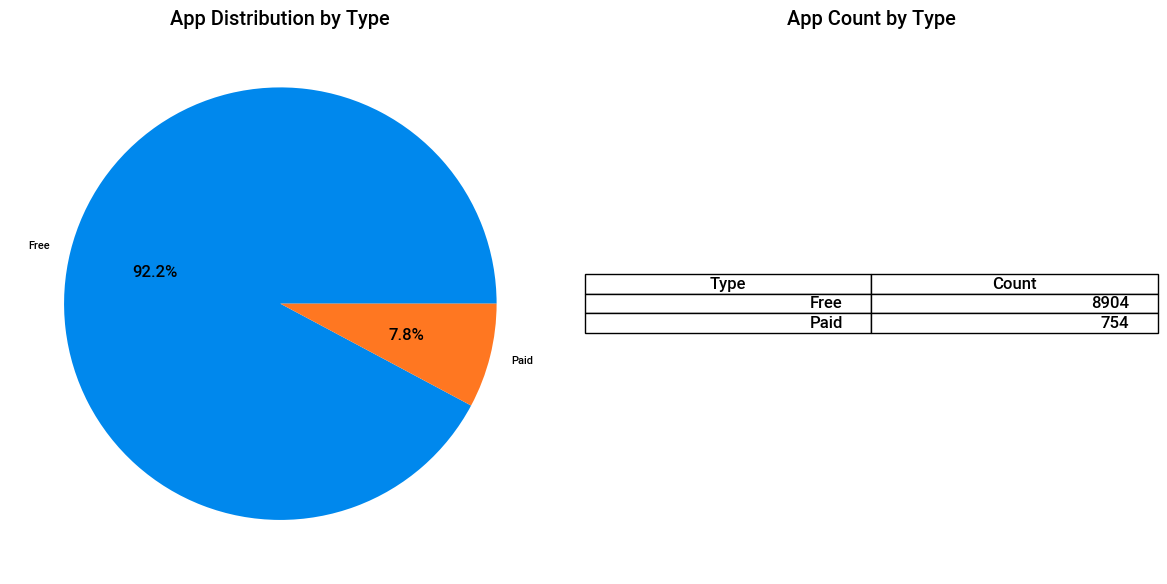

In [231]:
import matplotlib.pyplot as plt

# Count the number of apps by type
type_counts = app_df['Type'].value_counts()

# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart on the first subplot
ax1.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
ax1.set_title('App Distribution by Type')

# Create a table on the second subplot
table_data = [['Free', type_counts['Free']], ['Paid', type_counts['Paid']]]
table = ax2.table(cellText=table_data, colLabels=['Type', 'Count'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
ax2.axis('off')
ax2.set_title('App Count by Type')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Investigating the Rate given to apps in free and paid apps.

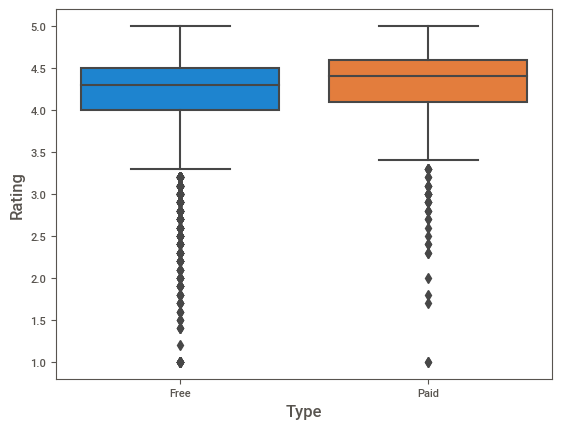

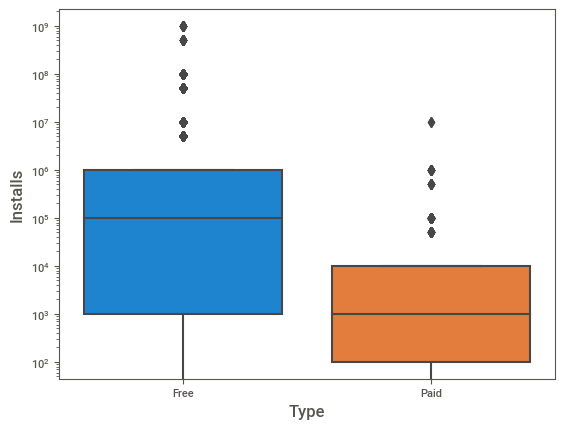

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=app_df,x='Type',y='Rating')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

sns.boxplot(data=app_df,x='Type',y='Installs')
plt.yscale('log')

plt.show()


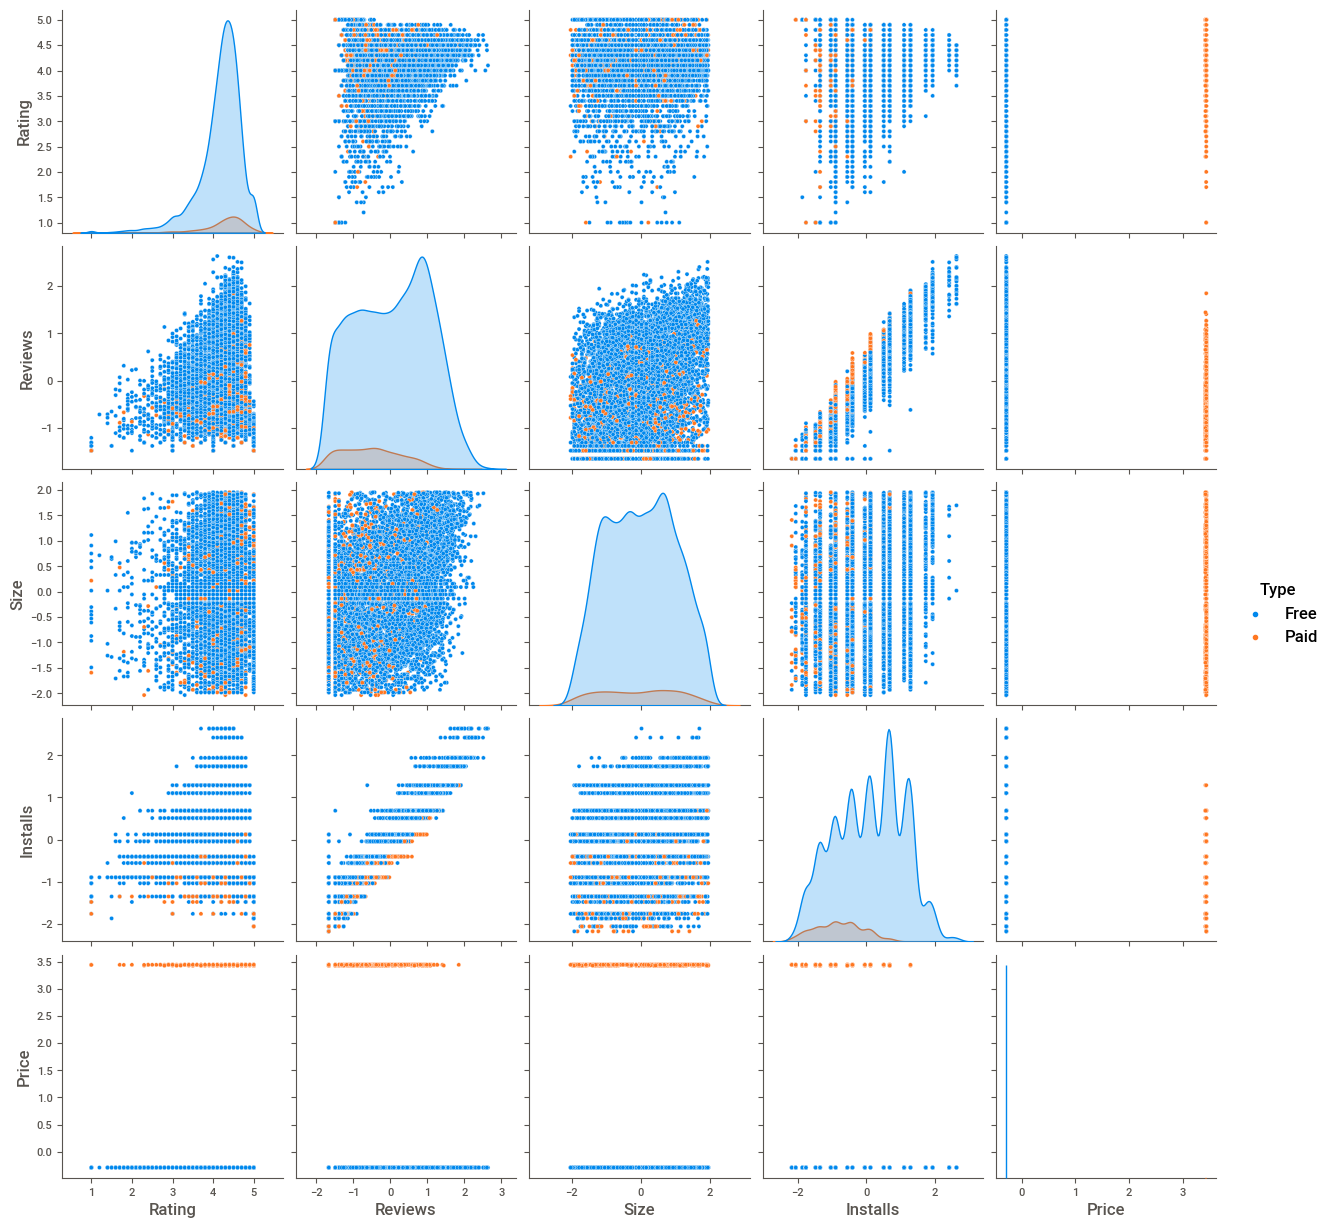

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Select the numerical columns for scaling
numerical_columns = ['Price', 'Reviews', 'Installs', 'Size']

# Create a copy of the DataFrame for scaling
subset_df = app_df.copy()

# Apply the power transformation to the numerical columns 
#(This process ensures that the data in the numerical columns is normalized or scaled in a way that can be useful for further analysis or modeling.)
transformer = PowerTransformer()
subset_df[numerical_columns] = transformer.fit_transform(subset_df[numerical_columns])

# Create the pair plot
sns.pairplot(subset_df, hue='Type')

# Display the plot
plt.show()



Using WordCloud to generate seperate word clouds for positive and negative Translated_Review  

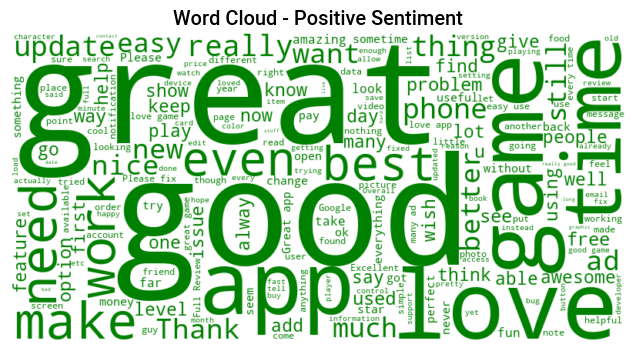

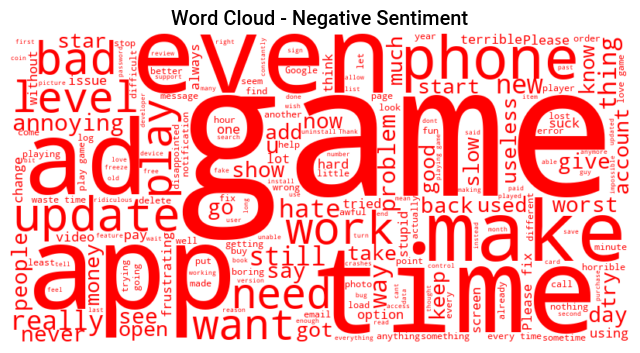

In [234]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define color mapping for sentiment polarity
#color_map = {1: 'green', -1: 'red'}

# Filter reviews with positive and negative sentiment polarity
positive_reviews = review_df[review_df['Sentiment_Polarity'] > 0]['Translated_Review'].astype(str)
negative_reviews = review_df[review_df['Sentiment_Polarity'] < 0]['Translated_Review'].astype(str)

# Concatenate positive and negative reviews into separate strings
positive_reviews_text = ' '.join(str(review) for review in positive_reviews)
negative_reviews_text = ' '.join(str(review) for review in negative_reviews)

# Create WordCloud objects with custom color mapping
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: 'green')
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: 'red')

# Generate word clouds for positive and negative reviews
positive_wordcloud.generate(positive_reviews_text)
negative_wordcloud.generate(negative_reviews_text)

# Plot the positive word cloud
plt.figure(figsize=(8, 4))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

# Plot the negative word cloud
plt.figure(figsize=(8, 45))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()





Generating an indepth EDA using sweetviz .

In [235]:
import sweetviz as sv

# Generate EDA report for app_df
app_report = sv.analyze(app_df)
app_report.show_html('app_eda_report.html')

# Generate EDA report for review_df
review_report = sv.analyze(review_df)
review_report.show_html('review_eda_report.html')


                                             |      | [  0%]   00:00 -> (? left)

Report app_eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |      | [  0%]   00:00 -> (? left)

Report review_eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [236]:
import pivottablejs

# Create pivot table for app_df
app_pivot = app_df.pivot_table(index='Category', columns='Type', values='Rating', aggfunc='mean', fill_value=0)

# Round the values in the pivot table to one decimal place
app_pivot = app_pivot.round(1)


# Display pivot table using PivotTableJS
pivottablejs.pivot_ui(app_pivot)


Pie chart and table to visualize the distribution of categories in app_df dataframe

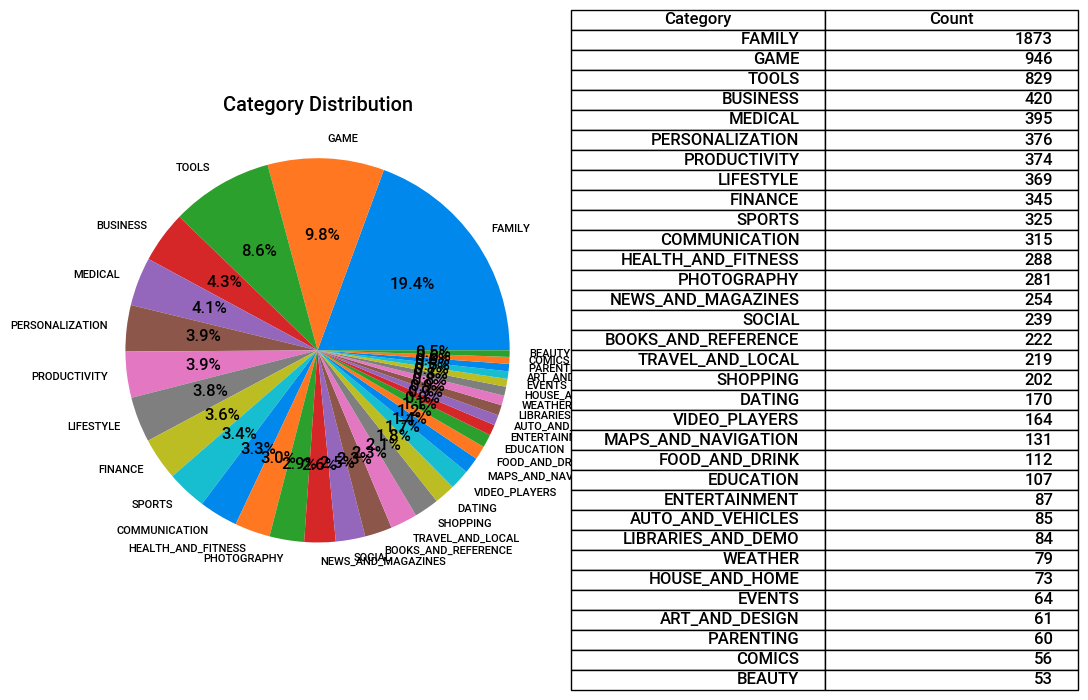

In [237]:
# Get the unique categories and their counts
unique_categories = app_df['Category'].value_counts()

# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the pie chart
ax1.pie(unique_categories, labels=unique_categories.index, autopct='%1.1f%%')
ax1.set_title('Category Distribution')
ax1.axis('equal')

# Creating a table
table_data = [(category, count) for category, count in zip(unique_categories.index, unique_categories)]
ax2.axis('off')
table = ax2.table(cellText=table_data, colLabels=['Category', 'Count'], loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Display the plot
plt.show()

Create the Category and Genres DataFrames
Create a Category DataFrame that has the following columns:

A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
A "category" column that has only the categories.
Export the DataFrame as a category.csv CSV file.

Create a Genre DataFrame that has the following columns:

A "genre_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
A "genre" column that has only the genre.
Export the DataFrame as a genre.csv CSV file.

In [238]:
# Extracting unique Categories' and Genres' name  
categories=app_df["Category"].unique()
genres=app_df["Genres"].unique()
# Making Ids
category_id=np.arange(1,len(categories)+1)
genre_id=np.arange(1,len(genres)+1)


In [239]:
# Use a list comprehension to add "cat" to each category_id.
catid=[f"cat{id}" for id in category_id]
genid=[f"gen{id}" for id in genre_id]

# Create a category DataFrame with the catid array as category_id and categories list as the category name.
category_dict={"Category id":catid ,"Category name":categories}
category_df = pd.DataFrame(category_dict)
# Create a genre DataFrame with the genid array as genre_id and genre list as the genre name.
genre_dict={"Genre id":genid ,"Genre name":genres}
genre_df = pd.DataFrame(genre_dict)



In [240]:
#Print built dataframes
category_df

,Category id,Category name
0,cat1,SPORTS
1,cat2,SOCIAL
2,cat3,COMICS
3,cat4,TOOLS
4,cat5,COMMUNICATION
5,cat6,NEWS_AND_MAGAZINES
6,cat7,HEALTH_AND_FITNESS
7,cat8,FAMILY
8,cat9,BOOKS_AND_REFERENCE
9,cat10,LIFESTYLE


In [241]:
#Print built dataframes
genre_df

,Genre id,Genre name
0,gen1,Sports
1,gen2,Social
2,gen3,Comics
3,gen4,Tools
4,gen5,Communication
...,...,...
113,gen114,Music & Audio;Music & Video
114,gen115,Comics;Creativity
115,gen116,Video Players & Editors;Creativity
116,gen117,Board;Pretend Play


In [242]:
# Export category_df and genre_df as CSV files.
category_df.to_csv("Output/category.csv", index=False)

genre_df.to_csv("Output/genre.csv", index=False)


#Export app_df as CSV file after doing all the cleanning procedures
app_df.to_csv("Output/app_cleaned_data.csv", index=False)